
===== SVM with linear Kernel =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



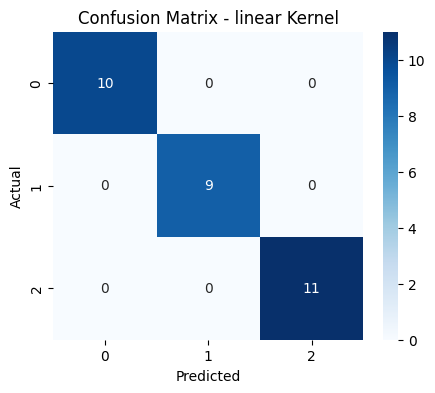


===== SVM with poly Kernel =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



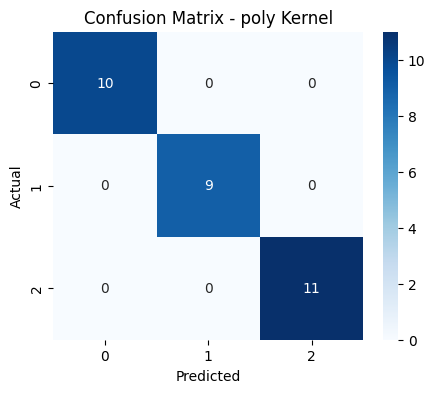


===== SVM with rbf Kernel =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



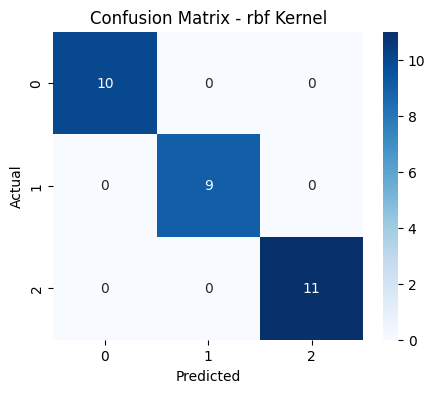


Best performing kernel: linear
Performance: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


In [1]:
# Importing Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# 80-20 Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, degree=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[kernel] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro')
    }

    print(f"\n===== SVM with {kernel} Kernel =====")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Best Kernel
best_kernel = max(results, key=lambda x: results[x]['Accuracy'])
print("\nBest performing kernel:", best_kernel)
print("Performance:", results[best_kernel])


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load Dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model without Scaling
svm_no_scale = SVC(kernel='rbf')
svm_no_scale.fit(X_train, y_train)

train_acc_no_scale = svm_no_scale.score(X_train, y_train)
test_acc_no_scale = svm_no_scale.score(X_test, y_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model With Scaling
svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)

train_acc_scaled = svm_scaled.score(X_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(X_test_scaled, y_test)

print("\n===== SVM Performance Comparison =====")
print(f"Without Scaling → Train Accuracy: {train_acc_no_scale:.4f}, Test Accuracy: {test_acc_no_scale:.4f}")
print(f"With Scaling →    Train Accuracy: {train_acc_scaled:.4f}, Test Accuracy:  {test_acc_scaled:.4f}")



===== SVM Performance Comparison =====
Without Scaling → Train Accuracy: 0.9143, Test Accuracy: 0.9474
With Scaling →    Train Accuracy: 0.9890, Test Accuracy:  0.9825
